# BME 4938 Homework 2

 # a) Load the dataset in an iPython notebook

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data.csv')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


## Preproscessing

Assign each individual test value (training data) to X and each status to Y

In [3]:
X = data.loc[:, 'MDVP:Fo(Hz)':'PPE'].values
y = data.loc[:, 'status'].values

# b) Splitting training and test data

I choose to split the training and test data 80:20

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

Print the dimensions of training and test data.

In [5]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (156, 22)
Y_train shape:  (156,)
X_test shape:  (39, 22)
Y_test shape:  (39,)


## Make a pipeline

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline


knn = make_pipeline(StandardScaler(), PCA(n_components=2), KNeighborsClassifier())

# b) Run the k-nn (k-nearest neighbors) algorithm on this dataset and find the optimal k using Grid search, where k={4, 5, 6, 7, 8, 9, 10}

In [7]:
from sklearn.model_selection import GridSearchCV

k = [4,5,6,7,8,9,10]

param_grid = [{'kneighborsclassifier__n_neighbors' : k}]

grid = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)
grid = grid.fit(X_train, y_train)

print('The best score is %.3f' % grid.best_score_)
print('The best parameter is %s'% grid.best_params_)

The best score is 0.897
The best parameter is {'kneighborsclassifier__n_neighbors': 5}


The function "grid.bestestimator" is used to calculate a test accuracy to see how well it performs.

In [8]:
clf = grid.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy with gridsearch is %.3f' % clf.score(X_test,y_test))

Test accuracy with gridsearch is 0.846


# c) Plot Learning curvess

Assign the the previous pipeline to the learning curve to see how well it learns through 5-fold cross-validation

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator= knn,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 20),
                               cv=5,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

## Actually plotting the learning curve

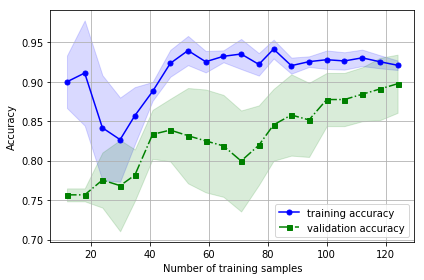

In [10]:
plt.plot(train_sizes,
         train_mean,
         color='blue',
         marker='o',
         markersize=5,
         label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15,
                 color='blue')

plt.plot(train_sizes,
         test_mean,
         color='green',
         linestyle='-.',
         marker='s',
         markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15,
                 color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# c) Plot the validation curves

In [11]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
                estimator= knn, 
                X=X_train, 
                y=y_train, 
                param_name='kneighborsclassifier__n_neighbors', 
                param_range=k,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

## Actually plotting the validation curves

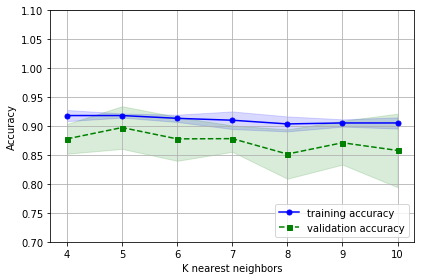

In [12]:
plt.plot(k,
         train_mean, 
         color='blue',
         marker='o', 
         markersize=5,
         label='training accuracy')

plt.fill_between(k,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15,
                 color='blue')

plt.plot(k,
         test_mean, 
         color='green',
         linestyle='--', 
         marker='s',
         markersize=5, 
         label='validation accuracy')

plt.fill_between(k, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15,
                 color='green')
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('K nearest neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.1])
plt.tight_layout()
plt.show()

# d) The link to this GitHub repository is https://github.com/TianhuaZhang/BME6938-Homework-2